In [114]:
#https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

#https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/
from scipy.stats import boxcox
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score


from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier

In [76]:
#df=pd.read_csv('https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/telco_customer_churn.csv')
df=pd.read_csv('telco_customer_churn.csv')
print(df.columns)
#print(df.head())

df.drop(['customerID'],axis=1)
df['Churn']=df['Churn'].apply(lambda row: 1 if row=='Yes' else 0)

df['Churn']=df['Churn'].astype('category').cat.codes
df['gender']=df['gender'].astype('category').cat.codes
df['OnlineSecurity']=df['OnlineSecurity'].astype('category').cat.codes
df['Partner']=df['Partner'].astype('category').cat.codes
df['Dependents']=df['Dependents'].astype('category').cat.codes
df['PhoneService']=df['PhoneService'].astype('category').cat.codes
df['MultipleLines']=df['MultipleLines'].astype('category').cat.codes
df['InternetService']=df['InternetService'].astype('category').cat.codes

df['OnlineSecurity']=df['OnlineSecurity'].astype('category').cat.codes
df['OnlineBackup']=df['OnlineBackup'].astype('category').cat.codes
df['DeviceProtection']=df['DeviceProtection'].astype('category').cat.codes
df['TechSupport']=df['TechSupport'].astype('category').cat.codes

df['StreamingTV']=df['StreamingTV'].astype('category').cat.codes
df['StreamingMovies']=df['StreamingMovies'].astype('category').cat.codes
df['Contract_enc']=df['Contract'].astype('category').cat.codes
df['PaperlessBilling']=df['PaperlessBilling'].astype('category').cat.codes
df['PaymentMethod']=df['PaymentMethod'].astype('category').cat.codes







Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Look for correlated features to drop:


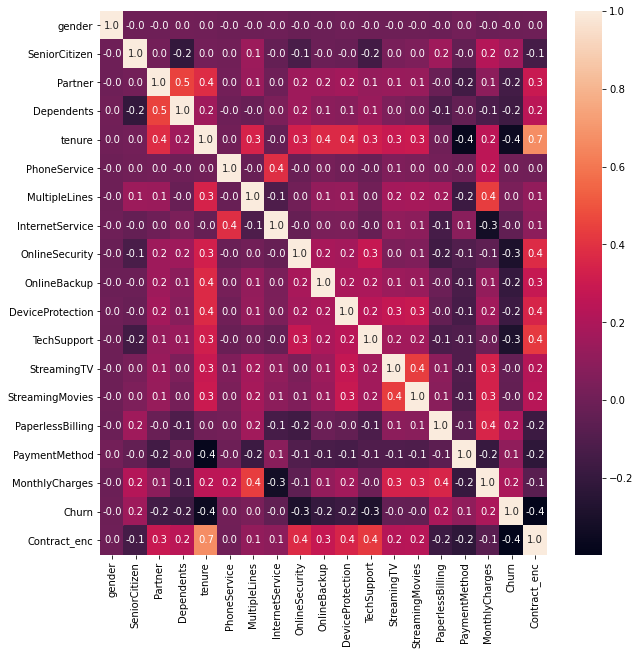

In [77]:
print("Look for correlated features to drop:")
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(df.corr(),annot=True,fmt=".1f",ax=ax)
plt.show()

In [78]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} )".format(pct, absolute)

def drawPieChart(label,data,title):
    fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
    
        ax.annotate(label[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    plt.title(title)
    plt.show()


Index(['Month-to-month', 'One year', 'Two year'], dtype='object', name='Contract')


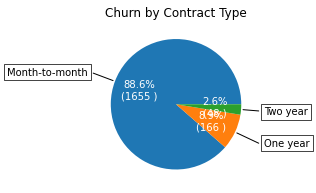

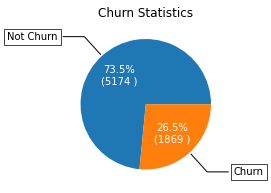

In [79]:
contractChurn=df[df['Churn']==1].groupby('Contract')['Churn'].count()

drawPieChart(contractChurn.index,contractChurn,"Churn by Contract Type")

df['MonthlyCharges']=pd.to_numeric(df['MonthlyCharges'],errors='coerce')
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

ini_array=df['TotalCharges'].values

#print(ini_array)
#insert an average for the missing total charges
res = np.where(np.isnan(ini_array), np.ma.array(ini_array, 
               mask = np.isnan(ini_array)).mean(axis = 0), ini_array)  

df['TotalCharges']=res

#print ("Display Churn Statistics:", df['Churn'].value_counts())


drawPieChart(['Not Churn','Churn'],df['Churn'].value_counts(),"Churn Statistics")


In [80]:
#print(df.head())

filter1=df['Churn']==1
filter2=df['tenure']<=1
result=df[filter1 & filter2]

contractChurn=df[filter1&filter2].groupby('Contract')['Churn'].count()
print(contractChurn)

print("churn occurs with tenure <= one year for a Month to month contract")

Contract
Month-to-month    380
Name: Churn, dtype: int64
churn occurs with tenure <= one year for a Month to month contract


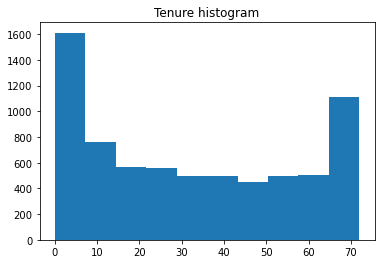

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


In [81]:
#print(len(result))
plt.hist(df['tenure'], bins=10)
plt.title("Tenure histogram")
plt.show()
#print(df[df['tenure']>50])

print (df['tenure'].value_counts())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract_enc  \
0                 0            0            0                0             0   
1         

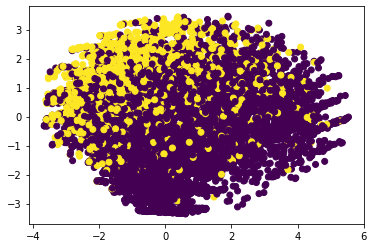

In [84]:
X=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract_enc', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]


y=df['Churn']

print(X.head())

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

labels=df['Churn'].values

pca=PCA(n_components=2)
pca.fit(X)

transformed=pca.transform(X)
print(transformed.shape)

xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=labels)
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


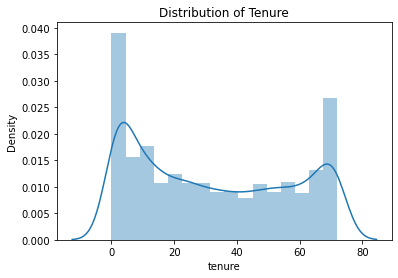

In [86]:
sns.distplot(df['tenure'])
plt.title("Distribution of Tenure")
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


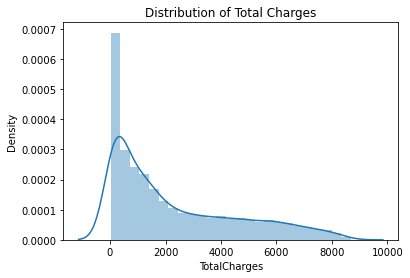

In [87]:
sns.distplot(df['TotalCharges'])
plt.title("Distribution of Total Charges")
plt.show()

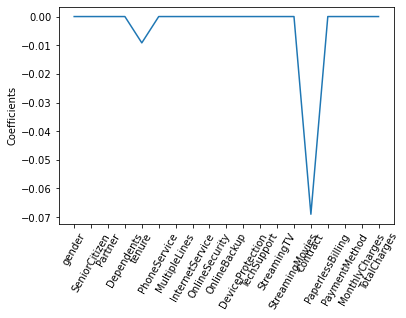

In [88]:
names=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
lasso=Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_

_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)),names,rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


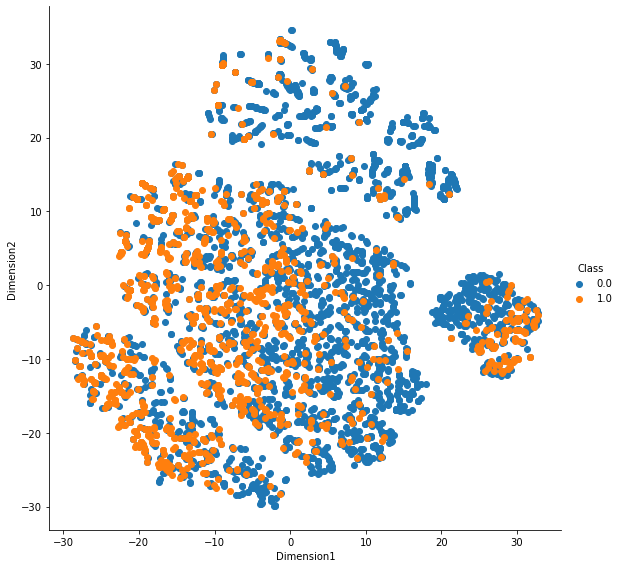

In [89]:
standardized_data = StandardScaler().fit_transform(X)

data_2k = standardized_data[0:5000]
labels_2k = y[0:5000]

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=400)

tsne_data = model.fit_transform(data_2k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, stratify = y, random_state = 42)
#L1 regularization called LASSO can be called explicitly, and this approach performs
#feature selection by shrinking some of the model coefficients to zero
lr = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, verbose = 3, warm_start = True)
lr.fit(X_train, y_train) 

[LibLinear]

LogisticRegression(C=0.1, penalty='l1', solver='liblinear', verbose=3,
                   warm_start=True)

Text(0, 0.5, 'TPR')

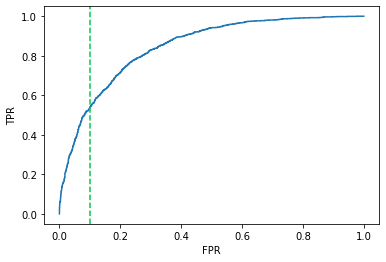

In [109]:
ytrain_pred_probas = lr.predict_proba(X_train)[:, 1]   # prob of predict as 1
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred_probas)   # precision_recall_curve
roc = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresholds})

_ = plt.figure()
plt.plot(roc.FPR, roc.TPR)
plt.axvline(0.1, color = '#00C851', linestyle = '--')
plt.xlabel("FPR")
plt.ylabel("TPR")

Predicted churn count  509


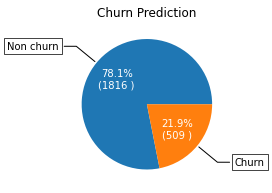

In [110]:
pred_test=lr.predict(X_test)

print("Predicted churn count ",len(pred_test[pred_test==1]))
buffer=pd.Series(pred_test)
#buffer.value_counts().plot(kind='pie')
#plt.show()

drawPieChart(['Non churn','Churn'],buffer.value_counts(),"Churn Prediction")

In [117]:


#print(confusion_matrix(y_test,y_pred))
# true positive     true negative
# false negative    false positive
print("Test Accuracy is %s",lr.score(X_test,y_test)*100)
pred_train=lr.predict(X_train)
print("Train Accuracy is %s",accuracy_score(y_train, pred_train))

print("Test Precision is %s",precision_score(y_test,pred_test))
print("Train Precision is %s",precision_score(y_train, pred_train))

print("Test Recall is %s",recall_score(y_test,pred_test))
print("Train Recall is %s",recall_score(y_train, pred_train))



Test Accuracy is %s 80.04301075268818
Train Accuracy is %s 0.8037303942348453
Test Precision is %s 0.650294695481336
Train Precision is %s 0.6591796875
Test Recall is %s 0.5364667747163695
Train Recall is %s 0.5391373801916933


Text(0.5, 257.44, 'Predicted label')

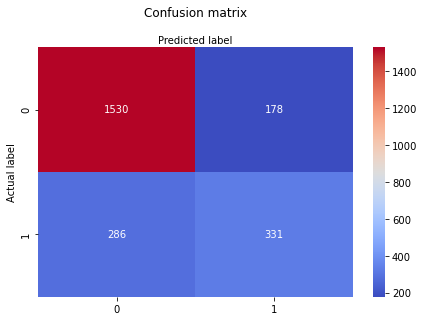

In [118]:
confusion_matrix_result = confusion_matrix(y_test,pred_test)

class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix_result), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

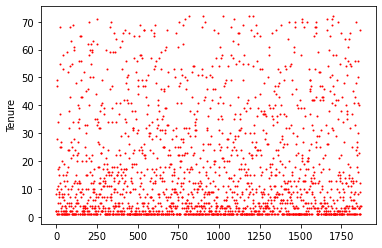

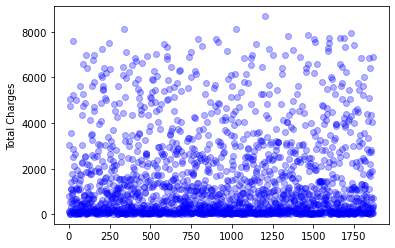

Correlation between tenure and totalCharges %s 0.9540174529269917
New customers represent the highest risk for churn. Offers and discount pricing and new features should be constantly offered to new customers


In [119]:
departed=df[df['Churn']==1]

tenure=departed['tenure']
totalCharges=departed['TotalCharges']

x=np.arange(0,len(tenure))

_=plt.scatter(x=x,y=tenure, c='red',s=1)
plt.ylabel('Tenure')
plt.show()

_=plt.scatter(x=x,y=totalCharges,c='blue',alpha=0.3)
plt.ylabel('Total Charges')
plt.show()

#####look for correlation between tenure and totalCharges which should be strong
dx = tenure - np.mean(tenure)
dy = totalCharges - np.mean(totalCharges)

zx=dx/np.std(tenure)
zy=dy/np.std(totalCharges)


######Correlation
###mean of the normalized distribution
correlation=np.mean(zx*zy)

print("Correlation between tenure and totalCharges %s", correlation)

print("New customers represent the highest risk for churn. Offers and discount pricing and new features should be constantly offered to new customers")




#x=np.arange(0,correlation.value_count())

#_=plt.scatter(x=x,y=correlation, c='green',s=1)
#plt.ylabel('Correlation')
#plt.show()


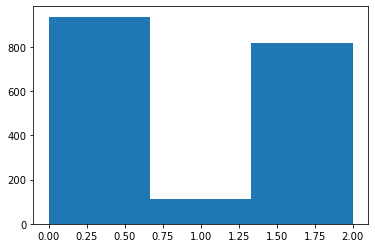

Contract Types and counts for departing customers
Contract
Month-to-month    380
Name: Churn, dtype: int64


In [120]:
departed=df[df['Churn']==1]

streaming_movie=departed['StreamingMovies']

plt.hist(streaming_movie,bins=3)
plt.show()

print("Contract Types and counts for departing customers")
print(contractChurn)



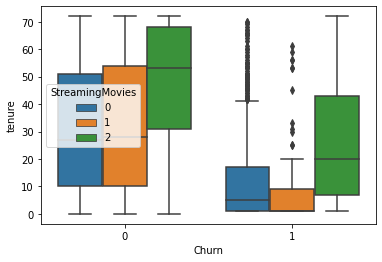

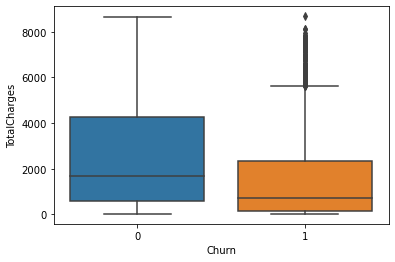

In [121]:
sns.boxplot(x='Churn', y='tenure',data=df, hue='StreamingMovies')
plt.show()

sns.boxplot(x='Churn', y='TotalCharges',data=df)
plt.show()

#churn group has a lower tenure average and lower Total Charges

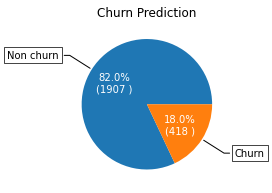

0 none churn 1 churn
Training accuracy: 0.7844
Testing accuracy: 0.7785
Training precision: 0.6397
Testing precision: 0.622
Training recall: 0.4297
Testing recall: 0.4214


In [123]:
dt= DecisionTreeClassifier(max_depth=3,random_state=1)

dt.fit(X_train, y_train)

pred_test= dt.predict(X_test)
pred_train= dt.predict(X_train)


buffer=pd.Series(pred_test)
#buffer.value_counts().plot(kind='pie')
#plt.show()

drawPieChart(['Non churn','Churn'],buffer.value_counts(),"Churn Prediction")

print("0 none churn 1 churn")

print("Training accuracy:",round(accuracy_score(y_train,pred_train),4))
print("Testing accuracy:", round(accuracy_score(y_test, pred_test),4))

print("Training precision:",round(precision_score(y_train,pred_train),4))
print("Testing precision:", round(precision_score(y_test, pred_test),4))

print("Training recall:",round(recall_score(y_train,pred_train),4))
print("Testing recall:", round(recall_score(y_test, pred_test),4))


In [124]:
depth_list=list(range(2,15))
depth_tuning = np.zeros((len(depth_list),4))
depth_tuning[:,0]=depth_list

for index in range(len(depth_list)):
    mytree=DecisionTreeClassifier(max_depth=depth_list[index])
    mytree.fit(X_train,y_train)
    pred_test_Y= mytree.predict(X_test)

    depth_tuning[index,1]=accuracy_score(y_test,pred_test_Y)
    depth_tuning[index,2]=precision_score(y_test,pred_test_Y)
    depth_tuning[index,3]=recall_score(y_test,pred_test_Y)
    
col_names=['Max_Depth','Accuracy','Precision','Recall']
print(pd.DataFrame(depth_tuning, columns=col_names))


    Max_Depth  Accuracy  Precision    Recall
0         2.0  0.738925   0.505695  0.719611
1         3.0  0.778495   0.622010  0.421394
2         4.0  0.776344   0.661130  0.322528
3         5.0  0.789247   0.603252  0.601297
4         6.0  0.784946   0.598319  0.576985
5         7.0  0.774624   0.578415  0.555916
6         8.0  0.771183   0.579439  0.502431
7         9.0  0.765591   0.563604  0.517018
8        10.0  0.757419   0.545769  0.512156
9        11.0  0.761290   0.553448  0.520259
10       12.0  0.755699   0.542024  0.512156
11       13.0  0.743656   0.516746  0.525122
12       14.0  0.732473   0.495826  0.481361


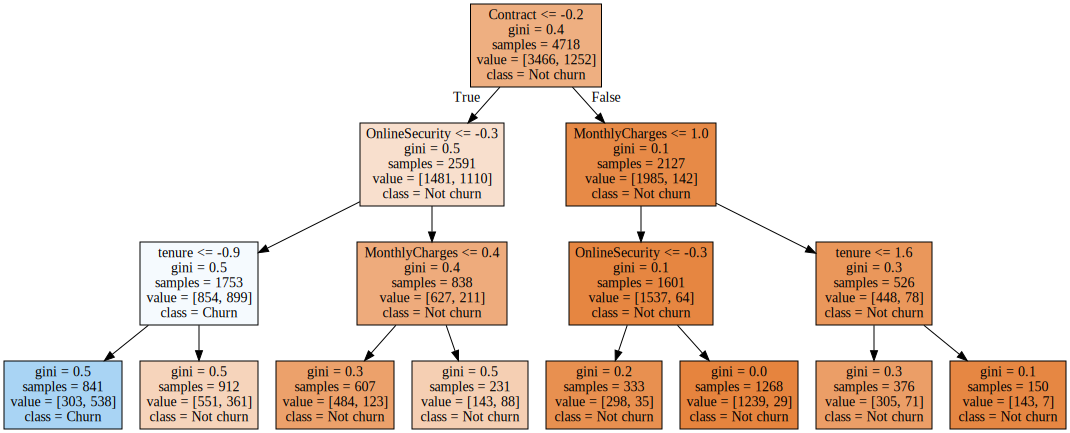

In [125]:
#target=df['Churn']
#cols=[col for col in df.columns if col not in target]

cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
source=df[cols]

exported=tree.export_graphviz(
    decision_tree=dt,
    out_file=None,
    feature_names=cols,
    precision=1,
    class_names=['Not churn','Churn'],
        filled=True)

graph=graphviz.Source(exported)
display(graph)

In [126]:
print("The features used to determine telco churn were : contract type, monthly charges, online security, and tenure.")

The features used to determine telco churn were : contract type, monthly charges, online security, and tenure.


In [127]:
#index=df['customerID']
#target=df['Churn']
#cols=[col for col in df.columns if col not in target]
cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
source=df[cols]
print(source.columns)
# Combine feature names and coefficients into pandas DataFrame
feature_names = pd.DataFrame(source, columns = ['Feature'])

log_coef = pd.DataFrame(np.transpose(lr.coef_), columns = ['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])

# Remove coefficients that are equal to zero
coefficients = coefficients[coefficients['Coefficient']!=0]

# Print the values sorted by the exponent coefficient
print(coefficients.sort_values(by=['Exp_Coefficient']))

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
      Feature  Coefficient  Exp_Coefficient
4         NaN    -0.737615         0.478253
14        NaN    -0.568672         0.566277
8         NaN    -0.218659         0.803596
11        NaN    -0.216041         0.805702
5         NaN    -0.205166         0.814512
...       ...          ...              ...
7038      NaN          NaN              NaN
7039      NaN          NaN              NaN
7040      NaN          NaN              NaN
7041      NaN          NaN              NaN
7042      NaN          NaN              NaN

[7039 rows x 3 columns]


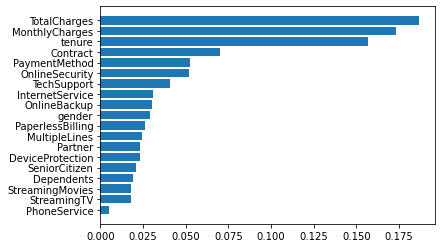

In [128]:
X=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]


y=df['Churn']
clf = RandomForestClassifier()
# Fit to the training data
clf.fit(X_train, y_train)
importances = clf.feature_importances_
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

